# Solving Coupled and Higher Order ODEs

A common way to solve higher order ODEs using numerical methods is to convert this to a system of first order ODEs. We will first look at solving systems of coupled first order diffrential equations, and then we will focus on reducing higher order ODEs to solve them in a similar manner.

## Coupled Ordinary Differential Equations

Consider a system of first order coupled ODEs in the form:

\begin{align*}
\frac{d x}{dt}(t) &= f\big(t, x(t), y(t)\big)\\
\frac{d y}{dt}(t) &= g\big(t, x(t), y(t)\big)
\end{align*}

given the initial conditions:

\begin{align*}
x(t_0) &= x_0\\
y(t_0) &= y_0
\end{align*}

where there is one independent variable $t$, and two dependent variables $x(t)$ and $y(t)$.

Note that we cannot simply solve the ODEs for $x$ and $y$ independently, as the ODE functions contain both of these variables. Instead, for our numerical solution, we must solve them simultaneously, step-by-step. Applying Euler's method, defining $t_{n + 1} = t_n + h$, $x_n = x(t_n)$ and $y_n = y(t_n)$, the update step is:

\begin{align*}
x_{n+1} &= x_{n} + f(t_n, x_n, y_n)\\
y_{n+1} &= y_{n} + g(t_n, x_n, y_n)\\
\end{align*}

As you can see, in order to calculate $x_{n+1}$, you need to know both the values of $x_n$ and $y_n$ (the same goes for $y_{n+1}$).

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Consider the coupled system of first order ODEs: <!-- Find something less arbitrary, or at least verifiable through analytic/intuitive means-->

\begin{align*}
\frac{d x}{dt} &= t  +x y\\
\frac{d y}{dt} &= t - x
\end{align*}

with the initial conditions

\begin{align*}
x(0) &= 0\\
y(0) &= 1
\end{align*}

Let's write a script to integrate these ODEs using Euler's method to find $x(t)$ and $y(t)$ up to $t = 10$. We'll store the values in an array and plot them at the end.

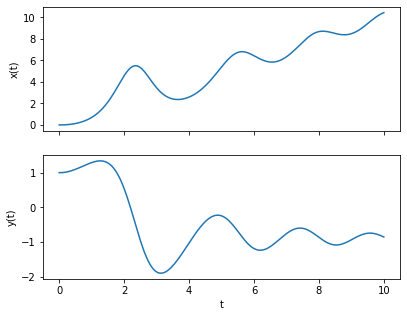

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t0, x0, y0 = 0, 0, 1 #initial conditions
h = 0.05 #step size
t_end = 10 #last time step


#The ODE functions
def f(t, x, y):
    return t + x * y

def g(t, x, y):
    return t - x


#Constructing the arrays:
t_arr = np.arange(t0, t_end + h, h) #make sure it goes up to and including t_end

x_arr = np.zeros(t_arr.size)
y_arr = np.zeros(t_arr.size)


#Setting the initial conditions
x_arr[0] = x0
y_arr[0] = y0


#Performing the Euler method, note we don't use the last t values in the update calculations
for i,t in enumerate(t_arr[:-1]):
    x_arr[i + 1] = x_arr[i] + h * f(t, x_arr[i], y_arr[i])
    y_arr[i + 1] = y_arr[i] + h * g(t, x_arr[i], y_arr[i])


##Plotting both curves
fig, ax = plt.subplots(2,1, sharex = True, figsize = (6.4, 5))

ax[0].plot(t_arr, x_arr)

ax[0].set_ylabel('x(t)')

ax[1].plot(t_arr, y_arr)

ax[1].set_xlabel('t')
ax[1].set_ylabel('y(t)')

plt.show()

</div>

### Arbitrarily Many Coupled Ordinary Differential Equations

Now, let's consider a general solution for arbitrarily many coupled ODEs. Consider the system of coupled first order differential equations:

\begin{align*}
\frac{d x_1}{dt} &= f_1 (t, x_1, x_2, \dots, x_m)\\
\frac{d x_2}{dt} &= f_2 (t, x_1, x_2, \dots, x_m)\\
\frac{d x_3}{dt} &= f_3 (t, x_1, x_2, \dots, x_m)\\
& \vdots\\
\frac{d x_m}{dt} &= f_m (t, x_1, x_2, \dots, x_m)\\
\end{align*}

with initial conditions:

\begin{align*}
x_1(t_0) &= x_{1\ 0}\\
x_2(t_0) &= x_{2\ 0}\\
x_3(t_0) &= x_{3\ 0}\\
& \vdots\\
x_m(t_0) &= x_{m\ 0}
\end{align*}

We can boil down the update step to a single line of code by vectorizing the equations and conditions using NumPy arrays. Let's define the following vector and vector function:

$$
\vec{x}(t) =
\begin{pmatrix}
x_1 (t)\\
x_2 (t)\\
x_3 (t)\\
\vdots\\
x_m (t)
\end{pmatrix} \quad \text{and} \quad
\vec{f}(\vec{x}) = 
\begin{pmatrix}
f_1 (t, \vec{x})\\
f_2 (t, \vec{x})\\
f_3 (t, \vec{x})\\
\vdots\\
f_m (t, \vec{x})
\end{pmatrix}
$$

The system of ODEs can now be written as:

$$
\frac{d \vec{x}}{dt} = \vec{f}(t, \vec{x})
$$

Using our usual definitions of $t_{n+1} = t_n + h$ and $\vec{x}(t_n) = \vec{x}_n$, the Euler update step can be written as:

$$
\vec{x}_{n+1} = \vec{x}_n + h  \vec{f}(t_n, \vec{x}_n)
$$


<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Consider the system of 3 first order coupled ODEs:

\begin{align*}
\frac{d x}{dt} &= t  +x y\\
\frac{d y}{dt} &= t - x\\
\frac{d z}{dt} &= y
\end{align*}

with the initial conditions

\begin{align*}
x(0) &= 0\\
y(0) &= 1\\
z(0) &= 0
\end{align*}

Let's adapt the previous script to integrate these coupled ODEs using Euler's method, this time making use of NumPy array's vectorized operations.

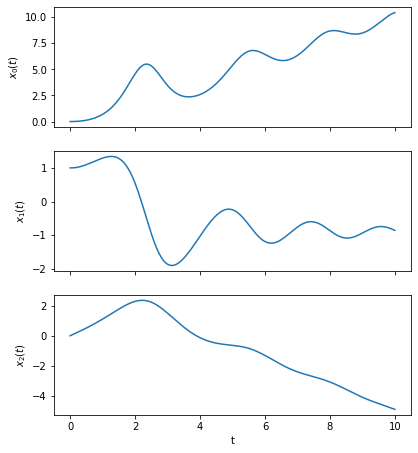

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
x0 = np.array([0, 1, 0]) #initial conditions
h = 0.05 #step size
t_end = 10 #last time step


#The ODE function
def f(t, x):
    return np.array([
        t + x[0] * x[1],
        t - x[0],
        x[1]
    ])


#Constructing the arrays:
t_arr = np.arange(t0, t_end + h, h) #make sure it goes up to and including t_end

x_arr = np.zeros((t_arr.size, x0.size)) #a 2D array, first dimension for t steps, second for the different x_i


#Setting the initial conditions
x_arr[0, :] = x0


#Performing the Euler method
for i,t in enumerate(t_arr[:-1]):
    x_arr[i + 1, :] = x_arr[i, :] + h * f(t, x_arr[i, :])


##Plotting all of the curves
fig, ax = plt.subplots(x0.size, 1, sharex = True, figsize = (6.4, 2.5 * x0.size))

for i in range(x0.size):
    ax[i].plot(t_arr, x_arr[:, i])
    ax[i].set_ylabel(fr'$x_{i}(t)$')

ax[-1].set_xlabel('t')

plt.show()

<!-- Show a script where a function is used? -->

</div>

## Second Order Differential Equations

In general, if we wish to solve an ODE of the form

$$
\frac{d^2y}{dx^2} = f\left(x, y, \frac{dy}{dx}\right)
$$

<!--- Problem with notation!!!!!!!!!! --->
with initial conditions $y(x = x_0) = y_0$ and $y'(x = x_0) = y'_0$ ,
we can transform these into a system of coupled first order equations by introducing the variable:

$$
v = \frac{dy}{dx}
$$

which gives us the equations:

$$
\begin{align*}
\frac{dy}{dx} &= v\\
\frac{dv}{dx} &= f(x, y, v)\\
\end{align*}
$$

with the initial conditions $y(x_0) = y_0$ and $v(x_0) = y'_0$.

As the ODE for $y$ depends on $v$ and the ODE for $v$ depends on $y$, these equations need to be integrated simultaneously.

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Consider second order ODE:

$$
\frac{d^2 y}{dt^2} + 10 \frac{dy}{dt} + 100y = 100 |\sin(t)|
$$

which we wish to solve for the initial conditions $y = 0.1$, $dy/dx = -0.5$ at $t = 0$.

Firstly let's rearrange the equation to make $y^{\prime\prime}$ the subject:

$$
\frac{d^2 y}{dt^2} = 100 |\sin(t)| - 10 \frac{dy}{dt} - 100 y
$$

We start by introducing the variables:

\begin{align*}
y_0 &= y\\
y_1 &= \frac{dy}{dt} = \frac{d y_0}{dt}\\
\end{align*}

which form the vector:

$$
\vec{y} = \begin{pmatrix} y_0 \\ y_1 \end{pmatrix}
$$

in order to reduce the second order ODE to a coupled system of two first order ODEs:

$$
\begin{align*}
\frac{d y_0}{dt} &= y_1\\
\frac{d y_1}{dt} &= 100|sin(t)| - 10 y_1 - 100 y_0
\end{align*}
$$

which can be vectorized as:

$$
\frac{d \vec{y}}{dt} =
\begin{pmatrix}
y_1\\
100|sin(t)| - 10 y_1 - 100 y_0
\end{pmatrix}
$$

This can be solved by modifying our solutions from the previous worked example:

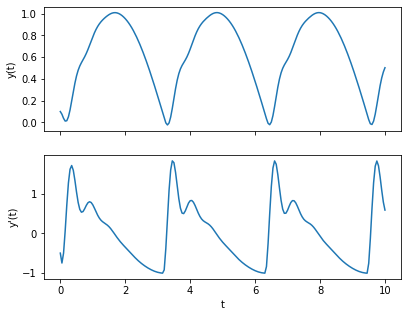

In [7]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
y0 = np.array([0.1, -0.5]) #initial conditions
h = 0.05 #step size
t_end = 10


#The ODE function
def f(t, y):
    return np.array([
        y[1],
        100*np.abs(np.sin(t)) - 10 * y[1] - 100 * y[0]
    ])


#Constructing the arrays:
t_arr = np.arange(t0, t_end + h, h) #make sure it goes up to and including x_end

y_arr = np.zeros((t_arr.size, y0.size))


#Setting the initial conditions
y_arr[0, :] = y0


#Performing the Euler method, note we don't use the last x value in the update calculations
for i,t in enumerate(t_arr[:-1]):
    y_arr[i + 1, :] = y_arr[i, :] + h * f(t, y_arr[i, :])
    
     
##Plotting both curves
fig, ax = plt.subplots(2,1, sharex = True, figsize = (6.4, 5))

ax[0].plot(t_arr, y_arr[:, 0])

ax[0].set_ylabel('y(t)')

ax[1].plot(t_arr, y_arr[:, 1])

ax[1].set_xlabel('t')
ax[1].set_ylabel("y'(t)")

plt.show()

In the solution above we used separate variables to store the values for $y(x)$ and $v(x)$. In the example below, we shall see that it is more practical to store these values in a single 2D array.

</div>

## Higher Order Differential Equations

We can extend this technique of creating a system of coupled first order equations to an ODE of arbitrary order:

$$
\frac{d^m y}{d x^m} =  f\left(x, \frac{d y}{dx}, \frac{d^2y}{dx^2}, \frac{d^3y}{dx^3}, \dots, \frac{d^{m-1} y}{dx^{m-1}} \right)
$$

with initial conditions

$$
y(x = x_0) = y_0 ~~~~~~ \frac{dy}{dx}(x = x_0) = y'_0 ~~~~~~ \frac{d^2y}{dx^2}(x = x_0) = y''_0 ~~~~~~ \dots ~~~~~~ \frac{d^{m-1}y}{dx^{m-1}}(x = x_0) = y^{(m-1)}_0
$$

We start by introducing the variables:

$$
y_0 = y ~~~~~~ y_1 = \frac{dy}{dx} ~~~~~~ y_2 = \frac{d^2y}{dx^2} ~~~~~~ \dots ~~~~~ y_{m-1} = \frac{d^{m-1}y}{dx^{m-1}}
$$

we can transform the order $m$ ODE to a set of $m$ first order coupled differential equations:

$$
\begin{align*}
\frac{d y_0}{dx} &= y_1\\
\frac{d y_1}{dx} &= y_2\\
\frac{d y_2}{dx} &= y_3\\
                &\vdots\\
\frac{d y_{m-2}}{dx} &= y_{m-1}\\
\frac{d y_{m-1}}{dx} &= f(x, y_0, y_1, y_2, y_3, \dots, y_{m-2}, y_{m-1})\\
\end{align*}
$$

Again, we can vectorize this in order to use a solution similar to those above:

$$
\vec{y} =
\begin{pmatrix}
y_0\\
y_1\\
\vdots\\
y_{m -1}
\end{pmatrix}
$$

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Consider the order 3 ODE:

$$
\frac{d^3 y}{dx^3} + y \frac{d^2 y}{dx^2} = 0
$$

with the initial conditions $y = 1$, $\tfrac{d}{dx}y = 0.5$ and $\tfrac{d^2}{dx^2} y = 0.7$ at $x = 0$.

To solve this we introduce the variables:

$$
\begin{align*}
y_0 &= y\\
y_1 &= \frac{d y}{dx}\\
y_2 &= \frac{d^2y}{dx^2}
\end{align*}
$$

This gives us the system of equations:

$$
\begin{align*}
\frac{dy_0}{dx} &= y_1\\
\frac{dy_1}{dx} &= y_2\\
\frac{dy_2}{dx} &= -y_0 y_2
\end{align*}
$$

The solution in Python is:

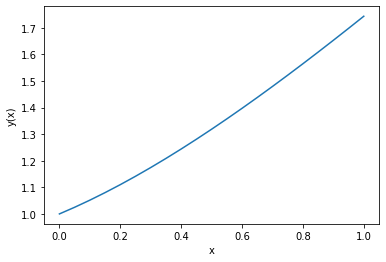

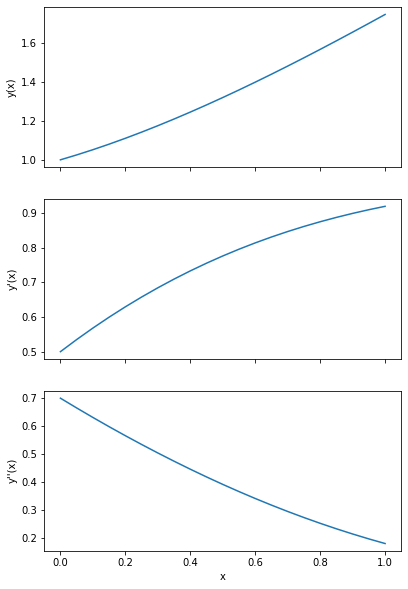

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x0, y0 = 0, [1, 0.5, 0.7] #initial conditions
h = 0.05
x_end = 1

##The ODE function (takes y as an array and returns an array of values)

def f(x, y):
    return np.array([
        y[1],
        y[2],
        - y[0] * y[2],
    ])


#Contructing the arrays
x_arr = np.arange(x0, x_end + h, h)

y_arr = np.zeros((x_arr.size, len(y0))) #Using y instead of v as there is no ambiguity
y_arr[0, :] = y0 #setting the initial conditions


#Performing the Euler method, note we don't use the last x value in the update calculations
for i,x in enumerate(x_arr[:-1]):
    y_arr[i+1, :] = y_arr[i, :] + h*f(x, y_arr[i, :])

    
##Plotting the solution for y(x) only
fig1, ax1 = plt.subplots()

ax1.plot(x_arr, y_arr[:, 0])

ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')

plt.show()

##Plotting the solutions to the derivatives
fig2, ax2 = plt.subplots(len(y0),1, sharex = True, figsize = (6.4, 10))


for i in range(len(y0)):
    ax2[i].plot(x_arr, y_arr[:, i])
    
    ax2[i].set_ylabel('y{}(x)'.format("'"*i))

ax2[-1].set_xlabel('x')

plt.show()

</div>